In [1]:
# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# main
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor
import shap

# misc
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', 500)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
data = pd.read_csv('PitcherData.csv')
data

,GameId,Role,PitcherHandedness,Delivery,ReleaseSpeed,ZoneSpeed,PitchVerticalApproachAngle,ReleaseExtension,ReleaseHeight,ReleaseSide,ArmAngleBR,ArmSlotBR,StrideLength,StrideLengthPercentHeight,StrideWidth,TimeToPlate,PeakHipsVeloX,PeakPitchHandVeloX,DLHipRotMin,HSSepMin,PARotMax,PAScapRetMin,SLKneeFlexFP,PAElbowFlexBR,SLKneeFlexBR,TorsoFBBR,TorsoSBBR,PeakMomDL,PeakMomSL,PeakMomTorso,PeakMomLFA,PeakMomLUA,PeakMomPFA,PeakMomPUA,PeakMomTotalBody,PeakMomTimeDL,PeakMomTimeSL,PeakMomTimeTorso,PeakMomTimeLFA,PeakMomTimeLUA,PeakMomTimePFA,PeakMomTimePUA,PeakMomTimeTotalBody,PeakPelvisRotVelo,PeakPelvisRotVeloTime,PeakChestRotVelo,PeakChestRotVeloTime,PeakElbowExtVelo,PeakElbowExtVeloTime,PeakShoulderIRVelo,PeakShoulderIRVeloTime,PelvisChestPeakTimeDiff,PeakSLKneeExtVelo,ClosingSpeed,ClosingTime,TimeFirstMove,TimeHandSeparation,TimePeakKneeLift,TimeFootPlant,TimeMER,PitchType,SpinRate,SpinDirection,InducedVertBreak,SpinEfficiency,PitchCount
0,717247,Pitcher,R,WU,92.883598,85.358162,-5.26402,7.200283,5.68847,-1.32301,104.899590,45.482530,6.234744,0.959191,0.480582,1.794048,9.999728,74.488926,-57.704386,-59.436962,184.867034,-26.459514,33.558428,46.156729,61.829131,35.014744,-19.803716,59.076818,65.505386,178.474295,14.589029,20.879261,25.940629,33.364805,316.155373,-0.225082,-0.278411,-0.071761,-0.118424,-0.115091,-0.005100,-0.051763,-0.078427,580.134192,-0.138422,1051.790412,-0.098426,1551.117321,-0.008433,2739.631800,0.014898,0.039996,-95.431603,519.237125,0.136655,-1.378319,-0.498392,-0.841697,-0.151755,-0.031765,FB,2010.934814,198.274002,15.237906,0.981800,1
1,716775,Pitcher,R,WU,92.162498,82.678711,-5.50739,7.074602,5.78597,-1.85525,97.735704,45.769597,5.785254,0.890039,0.457357,1.727100,9.242676,73.800552,-57.276927,-57.582635,183.756854,-48.689772,36.399829,48.956994,63.961833,33.845853,-20.061510,58.735936,61.773624,156.940774,14.079443,19.891426,25.076940,32.904583,301.055415,-0.198722,-0.422037,-0.125395,-0.148726,-0.118729,-0.002071,-0.048734,-0.135394,496.175175,-0.158725,1027.137579,-0.102063,1415.418660,-0.012071,3244.898378,0.011261,0.056662,-83.259474,466.447877,0.143322,-1.301965,-0.532028,-0.802006,-0.155392,-0.035402,FB,1991.656250,186.020004,18.172521,0.969281,1
2,716858,Pitcher,R,WU,82.715797,76.270004,-6.89922,6.584419,5.63218,-2.29365,93.595188,34.566340,5.763707,0.886724,0.511941,1.686831,8.663261,73.844070,-50.011344,-58.600042,177.195048,-37.923668,45.693107,47.207844,56.650464,33.564136,-20.971002,55.022454,63.380261,145.438170,13.719164,19.659263,25.668376,32.653768,294.829938,-0.156931,-0.376911,-0.150265,-0.166930,-0.110269,-0.010278,-0.050274,-0.160264,530.217031,-0.196927,1030.521089,-0.100270,1444.905634,-0.016944,2843.902854,0.009720,0.096657,-111.203636,488.495351,0.149986,-1.220166,-0.523564,-0.773540,-0.086937,-0.036942,NaN,2211.644287,134.322998,9.893006,0.381183,1
3,717247,Pitcher,R,WU,83.119797,75.655327,-5.24281,6.893004,5.59272,-1.73077,96.388369,36.804432,5.957531,0.916543,0.511139,1.815403,9.055229,74.069121,-57.962970,-55.065895,178.878454,-32.900200,54.958079,41.582631,58.934772,33.622471,-21.629818,60.764912,62.610400,168.421515,13.169548,19.434903,25.244505,33.298595,302.047333,-0.211766,-0.388417,-0.071779,-0.115108,-0.115108,-0.008451,-0.055113,-0.078445,633.641588,-0.131773,1075.259760,-0.098443,1429.031908,-0.011784,3225.623090,0.011547,0.033330,-219.777620,539.613373,0.136654,-1.348332,-0.498408,-0.821712,-0.078445,-0.035115,SL,2233.343750,122.036003,9.656799,0.366566,2
4,716775,Pitcher,R,WU,82.492897,74.397636,-7.73599,6.785694,5.60639,-2.27405,93.812173,34.557654,5.656930,0.870297,0.568982,1.739589,8.495374,73.059455,-57.106482,-49.458994,179.567484,-31.854868,36.941969,45.594204,61.485206,33.593086,-22.584209,56.903023,61.471940,158.717514,13.388108,18.683585,25.102197,32.331211,303.595953,-0.158551,-0.368511,-0.131889,-0.161884,-0.121891,-0.015246,-0.048572,-0.138554,582.870626,-0.128556,1001.115499,-0.105228,1396.443455,-0.015246,2964.765619,0.011416,0.023329,-37.581384,439.24289

In [3]:
data.isna().sum()[data.isna().sum()>0]

ReleaseExtension      3
PeakMomDL             3
PeakMomTimeSL         3
PeakMomTimeTorso      3
TimeHandSeparation    3
PitchType             4
SpinEfficiency        5
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isna().sum()[data.isna().sum()>0]

Series([], dtype: int64)

In [6]:
data['PitcherHandedness'].value_counts()

R    293
Name: PitcherHandedness, dtype: int64

In [7]:
data['Delivery'].value_counts()

WU    248
S      45
Name: Delivery, dtype: int64

In [8]:
data['PitchType'].value_counts()

SL    134
FB     87
CB     61
CH     11
Name: PitchType, dtype: int64

In [9]:
data.groupby('Delivery')['PitchType'].value_counts()

Delivery  PitchType
S         SL            17
          FB            12
          CB            10
          CH             6
WU        SL           117
          FB            75
          CB            51
          CH             5
Name: PitchType, dtype: int64

<Axes: >

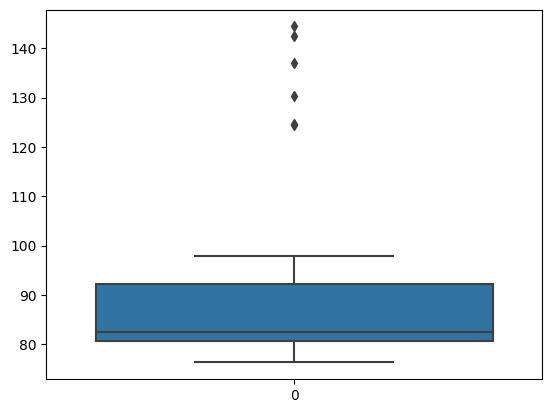

In [10]:
sns.boxplot(data['ReleaseSpeed'])

<Axes: xlabel='Delivery', ylabel='ReleaseSpeed'>

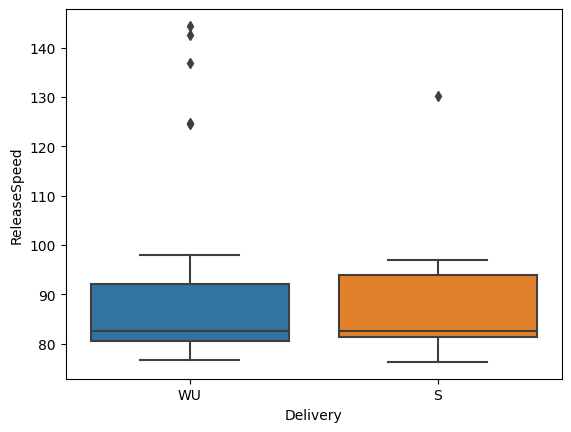

In [11]:
sns.boxplot(y = 'ReleaseSpeed', x ='Delivery', data=data)

<Axes: xlabel='PitchType', ylabel='ReleaseSpeed'>

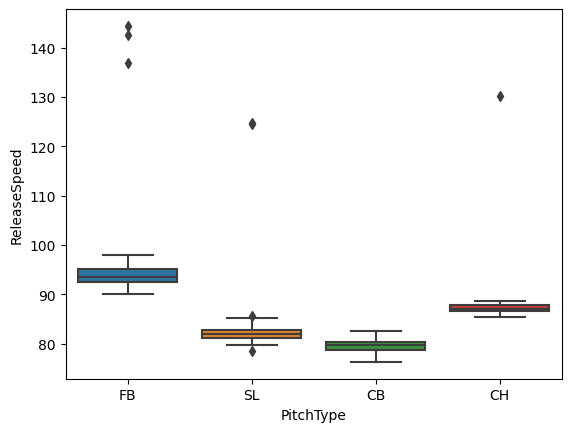

In [12]:
sns.boxplot(y = 'ReleaseSpeed', x ='PitchType', data=data)

<Axes: xlabel='Delivery', ylabel='ReleaseSpeed'>

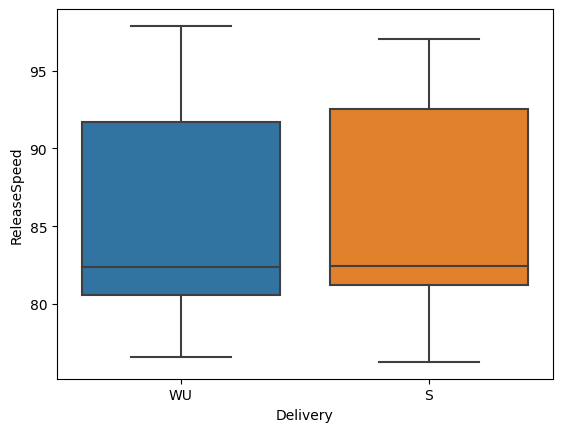

In [13]:
data = data[data['ReleaseSpeed']<110]
sns.boxplot(y = 'ReleaseSpeed', x ='Delivery', data=data)

<Axes: xlabel='PitchType', ylabel='ReleaseSpeed'>

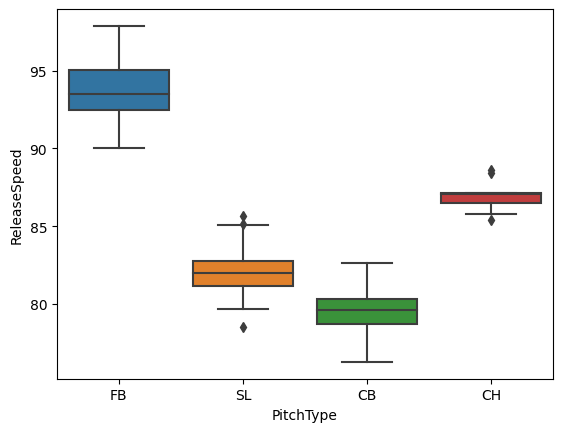

In [14]:
sns.boxplot(y = 'ReleaseSpeed', x ='PitchType', data=data)

In [15]:
data = data.drop(columns=['GameId','Role','PitcherHandedness','ZoneSpeed'])
data

,Delivery,ReleaseSpeed,PitchVerticalApproachAngle,ReleaseExtension,ReleaseHeight,ReleaseSide,ArmAngleBR,ArmSlotBR,StrideLength,StrideLengthPercentHeight,StrideWidth,TimeToPlate,PeakHipsVeloX,PeakPitchHandVeloX,DLHipRotMin,HSSepMin,PARotMax,PAScapRetMin,SLKneeFlexFP,PAElbowFlexBR,SLKneeFlexBR,TorsoFBBR,TorsoSBBR,PeakMomDL,PeakMomSL,PeakMomTorso,PeakMomLFA,PeakMomLUA,PeakMomPFA,PeakMomPUA,PeakMomTotalBody,PeakMomTimeDL,PeakMomTimeSL,PeakMomTimeTorso,PeakMomTimeLFA,PeakMomTimeLUA,PeakMomTimePFA,PeakMomTimePUA,PeakMomTimeTotalBody,PeakPelvisRotVelo,PeakPelvisRotVeloTime,PeakChestRotVelo,PeakChestRotVeloTime,PeakElbowExtVelo,PeakElbowExtVeloTime,PeakShoulderIRVelo,PeakShoulderIRVeloTime,PelvisChestPeakTimeDiff,PeakSLKneeExtVelo,ClosingSpeed,ClosingTime,TimeFirstMove,TimeHandSeparation,TimePeakKneeLift,TimeFootPlant,TimeMER,PitchType,SpinRate,SpinDirection,InducedVertBreak,SpinEfficiency,PitchCount
0,WU,92.883598,-5.26402,7.200283,5.68847,-1.32301,104.899590,45.482530,6.234744,0.959191,0.480582,1.794048,9.999728,74.488926,-57.704386,-59.436962,184.867034,-26.459514,33.558428,46.156729,61.829131,35.014744,-19.803716,59.076818,65.505386,178.474295,14.589029,20.879261,25.940629,33.364805,316.155373,-0.225082,-0.278411,-0.071761,-0.118424,-0.115091,-0.005100,-0.051763,-0.078427,580.134192,-0.138422,1051.790412,-0.098426,1551.117321,-0.008433,2739.631800,0.014898,0.039996,-95.431603,519.237125,0.136655,-1.378319,-0.498392,-0.841697,-0.151755,-0.031765,FB,2010.934814,198.274002,15.237906,0.981800,1
1,WU,92.162498,-5.50739,7.074602,5.78597,-1.85525,97.735704,45.769597,5.785254,0.890039,0.457357,1.727100,9.242676,73.800552,-57.276927,-57.582635,183.756854,-48.689772,36.399829,48.956994,63.961833,33.845853,-20.061510,58.735936,61.773624,156.940774,14.079443,19.891426,25.076940,32.904583,301.055415,-0.198722,-0.422037,-0.125395,-0.148726,-0.118729,-0.002071,-0.048734,-0.135394,496.175175,-0.158725,1027.137579,-0.102063,1415.418660,-0.012071,3244.898378,0.011261,0.056662,-83.259474,466.447877,0.143322,-1.301965,-0.532028,-0.802006,-0.155392,-0.035402,FB,1991.656250,186.020004,18.172521,0.969281,1
3,WU,83.119797,-5.24281,6.893004,5.59272,-1.73077,96.388369,36.804432,5.957531,0.916543,0.511139,1.815403,9.055229,74.069121,-57.962970,-55.065895,178.878454,-32.900200,54.958079,41.582631,58.934772,33.622471,-21.629818,60.764912,62.610400,168.421515,13.169548,19.434903,25.244505,33.298595,302.047333,-0.211766,-0.388417,-0.071779,-0.115108,-0.115108,-0.008451,-0.055113,-0.078445,633.641588,-0.131773,1075.259760,-0.098443,1429.031908,-0.011784,3225.623090,0.011547,0.033330,-219.777620,539.613373,0.136654,-1.348332,-0.498408,-0.821712,-0.078445,-0.035115,SL,2233.343750,122.036003,9.656799,0.366566,2
4,WU,82.492897,-7.73599,6.785694,5.60639,-2.27405,93.812173,34.557654,5.656930,0.870297,0.568982,1.739589,8.495374,73.059455,-57.106482,-49.458994,179.567484,-31.854868,36.941969,45.594204,61.485206,33.593086,-22.584209,56.903023,61.471940,158.717514,13.388108,18.683585,25.102197,32.331211,303.595953,-0.158551,-0.368511,-0.131889,-0.161884,-0.121891,-0.015246,-0.048572,-0.138554,582.870626,-0.128556,1001.115499,-0.105228,1396.443455,-0.015246,2964.765619,0.011416,0.023329,-37.581384,439.242897,0.149970,-1.265003,-0.535145,-0.781763,-0.145221,-0.038574,SL,2300.342041,114.580002,7.594166,0.465045,2
5,WU,83.572502,-6.38378,6.715177,5.53753,-1.76847,95.537047,33.780338,5.973094,0.918938,0.426591,1.722516,9.203898,74.071439,-57.243864,-56.705013,177.866684,-39.029932,34.551349,45.168563,54.948417,34.244271,-18.536711,58.235462,66.554217,161.336113,13.862835,19.723418,25.608168,33.883284,318.607623,-0.146354,-0.309674,-0.139688,-0.153020,-0.113024,-0.013032,-0.049696,-0.143021,447.190751,-0.116357,1086.533015,-0.096358,1537.151051,-0.009699,3252.122168,0.010299,0.019999,-176.216083,490.138621,0.146654,-1.262926,-0.482992,-0.759635,-0.139688,-0.033030,SL,2203.664307,149.445007,8.884223,0.365718,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [16]:
def get_top_corr(var,data,k):
    """
    Get the top 'k' variables that have the highest correlation with the specified 'var'.
    
    Parameters:
    - var (str): The variable/column for which the correlations are to be found.
    - k (int): The number of top correlated variables to return.
    - data (pd.DataFrame): The dataframe containing the data.
    
    Returns:
    - list: A list of tuples where each tuple contains a variable name and its correlation value with 'var'.
    """
    velo_corr = data.corr()[data.corr().index==var].to_dict(orient='index')[var]
    top_corr_keys = sorted(velo_corr, reverse=True, key=lambda dict_key: abs(velo_corr[dict_key]))[1:k+1]
    top_corr = []
    for k in top_corr_keys:
        top_corr.append((k, velo_corr[k]))
    return top_corr

get_top_corr('ReleaseSpeed',data,20)

[('SpinDirection', 0.7870116786554697),
 ('PitchVerticalApproachAngle', 0.7367406978822207),
 ('StrideWidth', -0.7134506155044857),
 ('InducedVertBreak', 0.7020032004628227),
 ('SpinEfficiency', 0.527999810280214),
 ('PeakPitchHandVeloX', 0.5279612979357149),
 ('PARotMax', 0.496811100606572),
 ('PeakChestRotVelo', 0.48609838176321873),
 ('SLKneeFlexBR', -0.46235618712018833),
 ('ReleaseExtension', 0.46058815014985777),
 ('PeakMomPUA', 0.44759638579239214),
 ('PeakMomPFA', 0.4404265823975428),
 ('PeakMomDL', 0.41071283765504035),
 ('PeakMomTimePUA', 0.4042006334074793),
 ('PeakMomLUA', 0.3998787366508144),
 ('TimeMER', 0.38551862760537003),
 ('HSSepMin', -0.3689983597845223),
 ('PeakChestRotVeloTime', 0.33543059138092446),
 ('PeakMomSL', 0.3313017276617315),
 ('PeakMomTimeLFA', 0.3214215149348249)]

In [17]:
fb_data = data[data['PitchType']=='FB']
fb_data['ReleaseSpeed'].var()

3.205047108581333

In [18]:
fb_corr_20 = get_top_corr('ReleaseSpeed',fb_data,20)
fb_corr_20

[('SLKneeFlexBR', -0.7830031937312459),
 ('ArmSlotBR', -0.7446951940922506),
 ('ArmAngleBR', -0.6532137621695158),
 ('PeakChestRotVelo', 0.6478176286585406),
 ('PeakSLKneeExtVelo', -0.5971687405299773),
 ('PeakMomPUA', 0.4822279027222014),
 ('PeakElbowExtVeloTime', -0.47640817436915367),
 ('SpinRate', 0.46427555831846673),
 ('PeakPitchHandVeloX', 0.4442454441516614),
 ('PeakPelvisRotVelo', 0.4362019419396183),
 ('PeakChestRotVeloTime', 0.4111320847928064),
 ('HSSepMin', -0.3831061544128458),
 ('PeakShoulderIRVeloTime', -0.375377668257055),
 ('InducedVertBreak', -0.36225964560127377),
 ('PeakMomSL', 0.35364236081028766),
 ('StrideWidth', -0.3482555407947987),
 ('ReleaseExtension', -0.34354087338785466),
 ('DLHipRotMin', -0.32840869127573596),
 ('PeakElbowExtVelo', -0.3270489779156493),
 ('TorsoSBBR', 0.2949765680923434)]

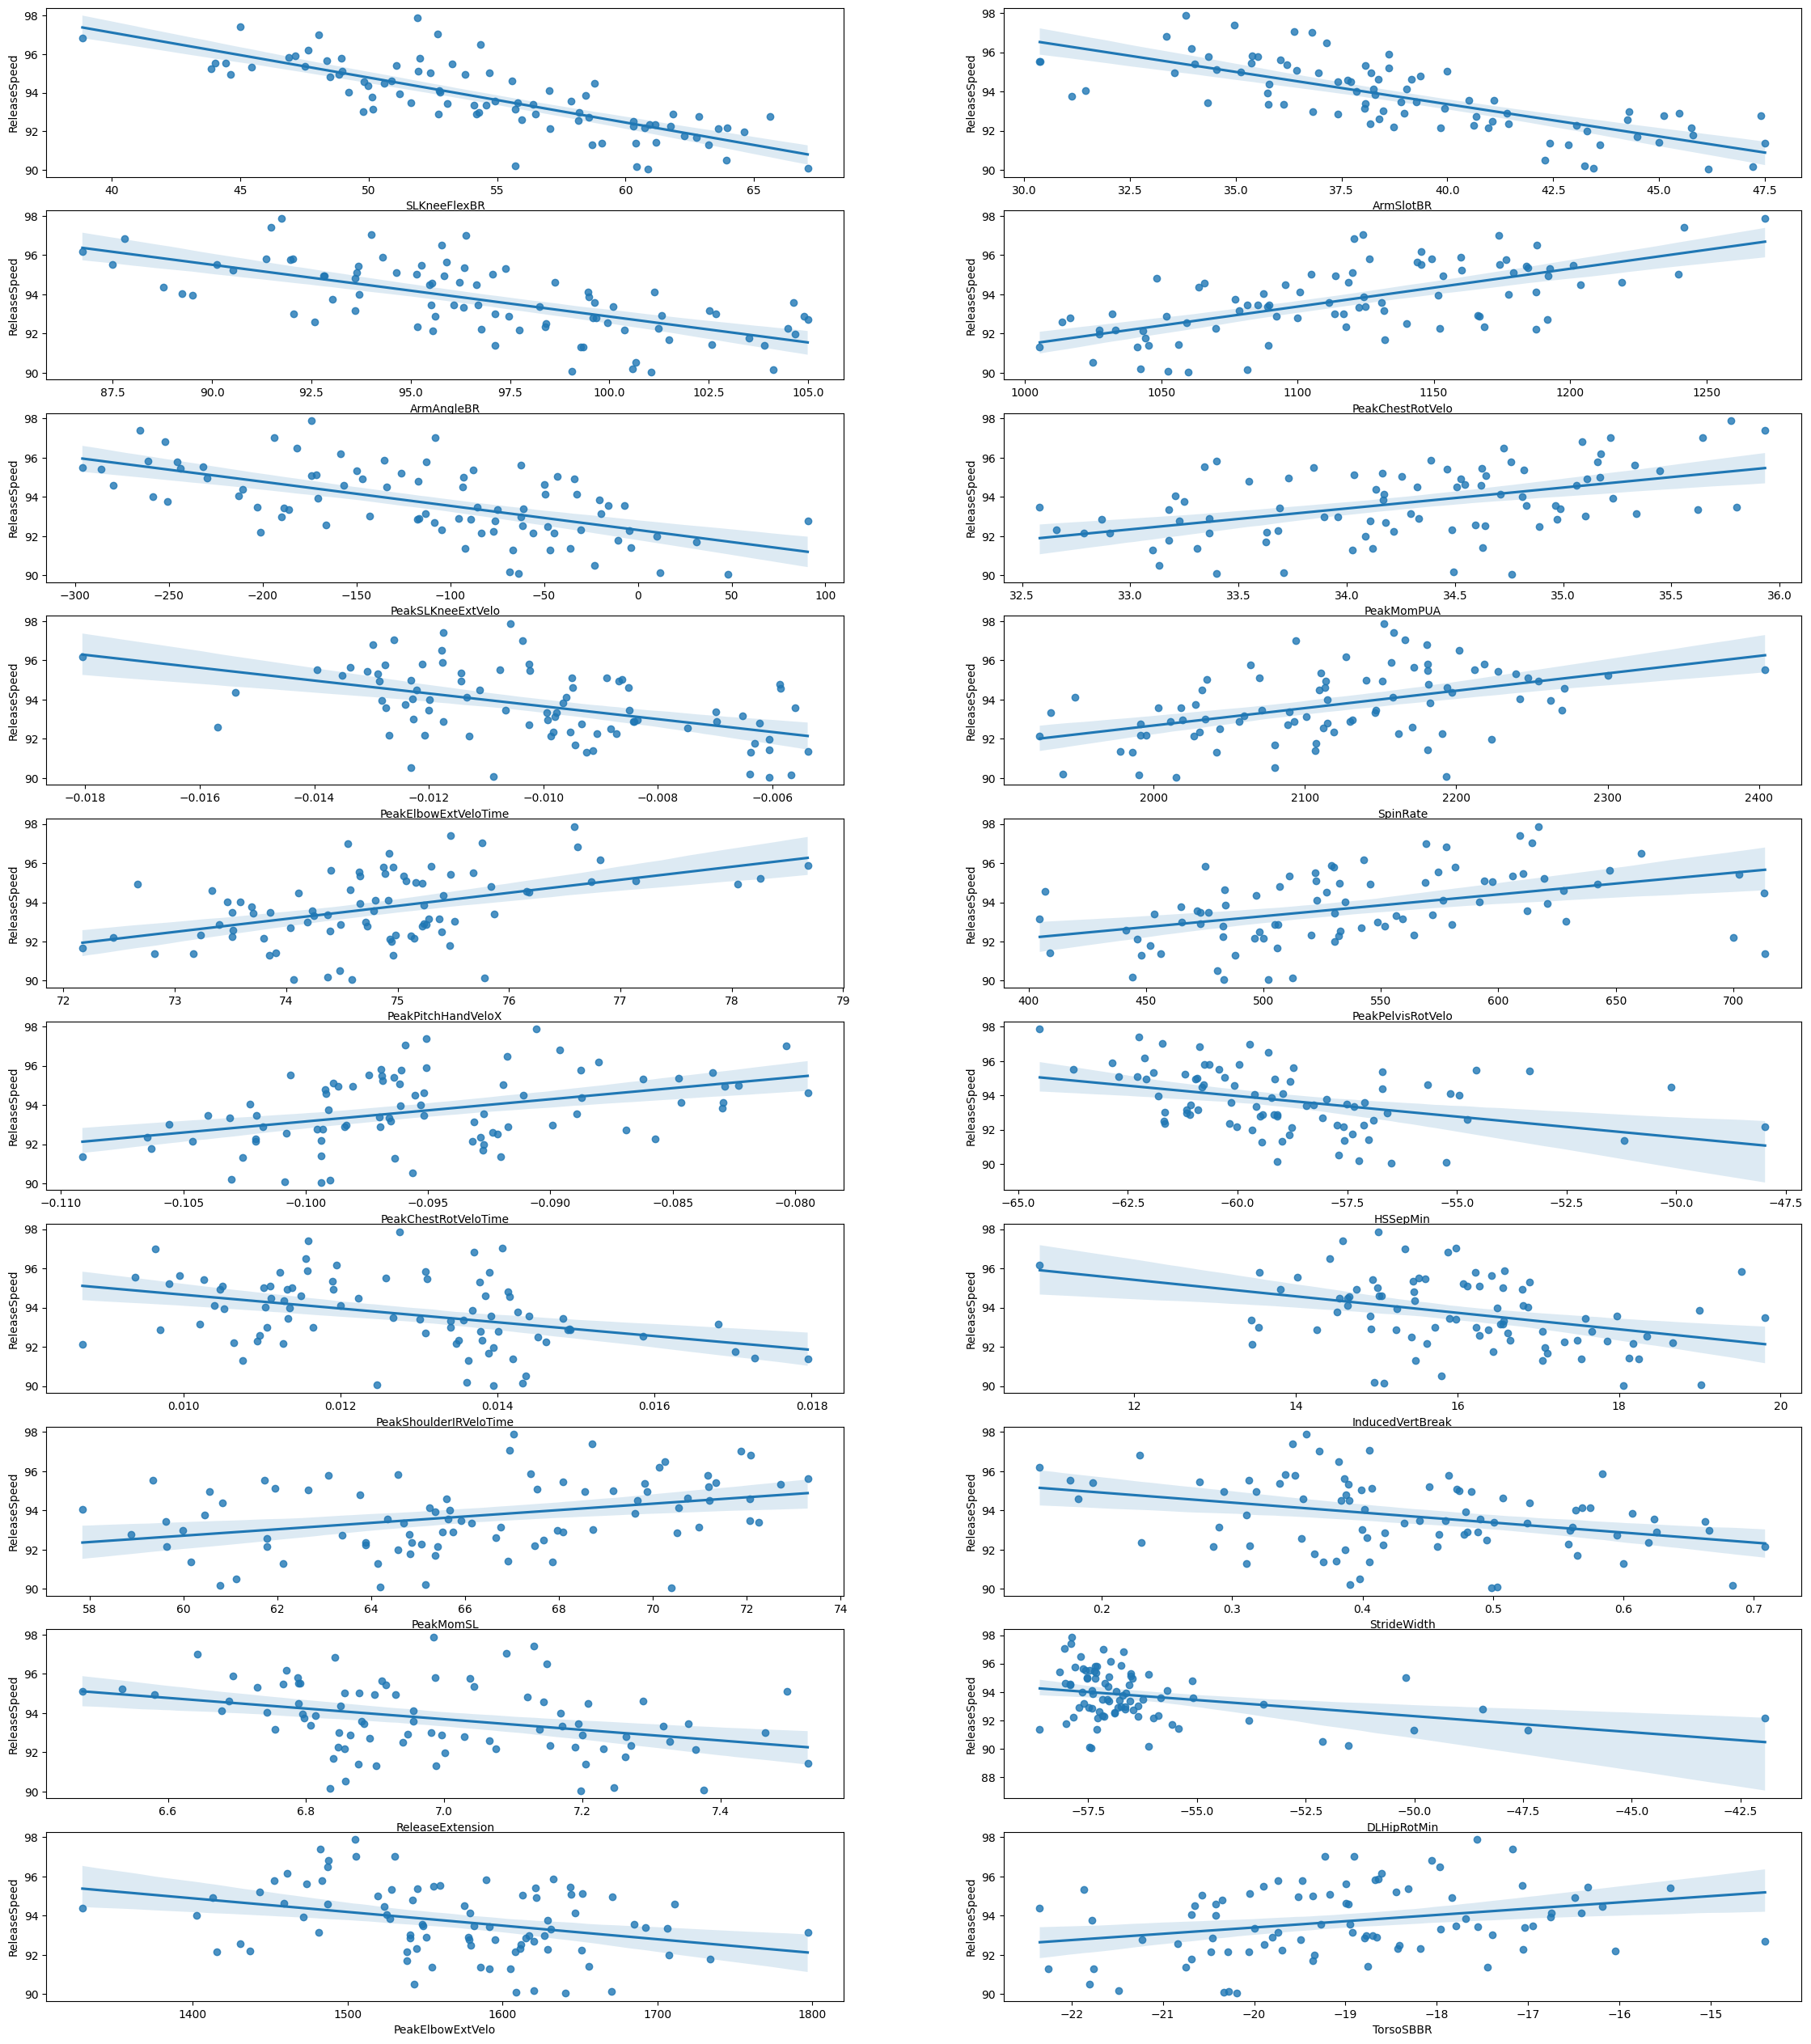

In [19]:
fig_fb, ax_fb = plt.subplots(10,2, figsize=(28,32))
sns.regplot(y='ReleaseSpeed', x='SLKneeFlexBR', data=fb_data, ax=ax_fb[0][0])
sns.regplot(y='ReleaseSpeed', x='ArmSlotBR', data=fb_data, ax=ax_fb[0][1])
sns.regplot(y='ReleaseSpeed', x='ArmAngleBR', data=fb_data, ax=ax_fb[1][0])
sns.regplot(y='ReleaseSpeed', x='PeakChestRotVelo', data=fb_data, ax=ax_fb[1][1])
sns.regplot(y='ReleaseSpeed', x='PeakSLKneeExtVelo', data=fb_data, ax=ax_fb[2][0])
sns.regplot(y='ReleaseSpeed', x='PeakMomPUA', data=fb_data, ax=ax_fb[2][1])
sns.regplot(y='ReleaseSpeed', x='PeakElbowExtVeloTime', data=fb_data, ax=ax_fb[3][0])
sns.regplot(y='ReleaseSpeed', x='SpinRate', data=fb_data, ax=ax_fb[3][1])
sns.regplot(y='ReleaseSpeed', x='PeakPitchHandVeloX', data=fb_data, ax=ax_fb[4][0])
sns.regplot(y='ReleaseSpeed', x='PeakPelvisRotVelo', data=fb_data, ax=ax_fb[4][1])
sns.regplot(y='ReleaseSpeed', x='PeakChestRotVeloTime', data=fb_data, ax=ax_fb[5][0])
sns.regplot(y='ReleaseSpeed', x='HSSepMin', data=fb_data, ax=ax_fb[5][1])
sns.regplot(y='ReleaseSpeed', x='PeakShoulderIRVeloTime', data=fb_data, ax=ax_fb[6][0])
sns.regplot(y='ReleaseSpeed', x='InducedVertBreak', data=fb_data, ax=ax_fb[6][1])
sns.regplot(y='ReleaseSpeed', x='PeakMomSL', data=fb_data, ax=ax_fb[7][0])
sns.regplot(y='ReleaseSpeed', x='StrideWidth', data=fb_data, ax=ax_fb[7][1])
sns.regplot(y='ReleaseSpeed', x='ReleaseExtension', data=fb_data, ax=ax_fb[8][0])
sns.regplot(y='ReleaseSpeed', x='DLHipRotMin', data=fb_data, ax=ax_fb[8][1])
sns.regplot(y='ReleaseSpeed', x='PeakElbowExtVelo', data=fb_data, ax=ax_fb[9][0])
sns.regplot(y='ReleaseSpeed', x='TorsoSBBR', data=fb_data, ax=ax_fb[9][1])

plt.show()

In [20]:
fb_data['Delivery'].value_counts()

WU    72
S     12
Name: Delivery, dtype: int64

In [21]:
[('SLKneeFlexBR', -0.7830031937312459),
 ('ArmSlotBR', -0.7446951940922506),
 ('ArmAngleBR', -0.6532137621695158),
 ('PeakChestRotVelo', 0.6478176286585406),
 ('PeakSLKneeExtVelo', -0.5971687405299773),
 ('PeakMomPUA', 0.4822279027222014),
 ('PeakElbowExtVeloTime', -0.47640817436915367),
 ('SpinRate', 0.46427555831846673),
 ('PeakPitchHandVeloX', 0.4442454441516614),
 ('PeakPelvisRotVelo', 0.4362019419396183),
 ('PeakChestRotVeloTime', 0.4111320847928064),
 ('HSSepMin', -0.3831061544128458),
 ('PeakShoulderIRVeloTime', -0.375377668257055),
 ('InducedVertBreak', -0.36225964560127377),
 ('PeakMomSL', 0.35364236081028766),
 ('StrideWidth', -0.3482555407947987),
 ('ReleaseExtension', -0.34354087338785466),
 ('DLHipRotMin', -0.32840869127573596),
 ('PeakElbowExtVelo', -0.3270489779156493),
 ('TorsoSBBR', 0.2949765680923434)]

[('SLKneeFlexBR', -0.7830031937312459),
 ('ArmSlotBR', -0.7446951940922506),
 ('ArmAngleBR', -0.6532137621695158),
 ('PeakChestRotVelo', 0.6478176286585406),
 ('PeakSLKneeExtVelo', -0.5971687405299773),
 ('PeakMomPUA', 0.4822279027222014),
 ('PeakElbowExtVeloTime', -0.47640817436915367),
 ('SpinRate', 0.46427555831846673),
 ('PeakPitchHandVeloX', 0.4442454441516614),
 ('PeakPelvisRotVelo', 0.4362019419396183),
 ('PeakChestRotVeloTime', 0.4111320847928064),
 ('HSSepMin', -0.3831061544128458),
 ('PeakShoulderIRVeloTime', -0.375377668257055),
 ('InducedVertBreak', -0.36225964560127377),
 ('PeakMomSL', 0.35364236081028766),
 ('StrideWidth', -0.3482555407947987),
 ('ReleaseExtension', -0.34354087338785466),
 ('DLHipRotMin', -0.32840869127573596),
 ('PeakElbowExtVelo', -0.3270489779156493),
 ('TorsoSBBR', 0.2949765680923434)]

Linear Regression MSE: 0.8194562667924876
Linear Regression R2: 0.7223315563227641
Random Forest MSE: 0.9489886896038928
Random Forest R2: 0.6784401765075037
XGBoost MSE: 1.1661879723202744
XGBoost R2: 0.6048433425535302


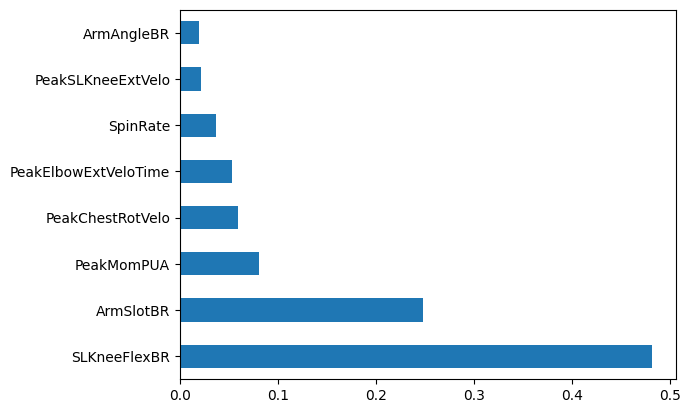

In [24]:
# Model Development
# Split the data into training and testing sets
features = ['SLKneeFlexBR','ArmSlotBR','ArmAngleBR','PeakChestRotVelo','PeakSLKneeExtVelo','PeakMomPUA','PeakElbowExtVeloTime','SpinRate']
X_train, X_test, y_train, y_test = train_test_split(fb_data[features], fb_data['ReleaseSpeed'], test_size=0.3, random_state=42)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Random Forest Model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

xgb_model = XGBRegressor(objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

# Model Evaluation
# Evaluate Linear Regression Model
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Evaluate Random Forest Model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the results
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)
print("XGBoost MSE:", mse_xgb)
print("XGBoost R2:", r2_xgb)

# Plotting feature importance (for Random Forest)
feature_importances = pd.Series(rf_model.feature_importances_, index=features)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()